In [29]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [4]:
def plot_metrics(data_frame):
    block_size = 1000
    df['episode_block'] = df.index // block_size
    
    df_mean = df.groupby('episode_block').mean()
    
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
    ax[0, 0].set_title("$C_{bp}$")
    ax[0, 0].set_ylim(0, 1)
    df_mean['cbp'].plot(ax=ax[0, 0])
    
    ax[0, 1].set_title("$C_{bt2}$(Success)")
    ax[0, 1].set_ylim(0, 1)
    df_mean['cbt2'].plot(ax=ax[0, 1])
    
    ax[1, 0].set_title("$C_{bn}$")
    ax[1, 0].set_ylim(0, 1)
    df_mean['cbn'].plot(ax=ax[1, 0])
    
    ax[1, 1].set_title("$Cumulative Reward$")
    ax[1, 1].set_ylim(0, 10)
    df_mean['rtn'].plot(ax=ax[1, 1])

In [5]:
def compare_metrics(dataframe1, dataframe2, name1, name2):
    block_size = 1000
    # 1) 공통 길이 산출 및 '완전한 블록'까지만 자르기
    min_len = min(len(df), len(compare_df))
    trim_len = (min_len // block_size) * block_size   # 마지막 불완전 블록 제거(공정 비교)
    
    df_trim = dataframe1.iloc[:trim_len].copy()
    compare_trim = dataframe2.iloc[:trim_len].copy()
    
    # 2) 블록 인덱스 부여
    df_trim['episode_block'] = df_trim.index // block_size
    compare_trim['episode_block'] = compare_trim.index // block_size
    
    # 3) 블록 평균
    df_mean = df_trim.groupby('episode_block').mean(numeric_only=True)
    compare_mean = compare_trim.groupby('episode_block').mean(numeric_only=True)
    
    # 4) 플롯
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    # subplot 1
    ax[0].set_title("$C_{bp}$");  ax[0].set_ylim(0, 1)
    df_mean['cbp'].plot(ax=ax[0], label=name1)
    compare_mean['cbp'].plot(ax=ax[0], label=name2)
    ax[0].legend()
    
    # subplot 2
    ax[1].set_title("$C_{bt2}$"); ax[1].set_ylim(0, 1)
    df_mean['cbt2'].plot(ax=ax[1], label=name1)
    compare_mean['cbt2'].plot(ax=ax[1], label=name2)
    ax[1].legend()
    
    # subplot 3
    ax[2].set_title("$C_{bn}$");  ax[2].set_ylim(0, 1)
    df_mean['cbn'].plot(ax=ax[2], label=name1)
    compare_mean['cbn'].plot(ax=ax[2], label=name2)
    ax[2].legend()
    
    # subplot 4
    plt.tight_layout()
    plt.show()

In [6]:
def plot_sorted_cumulative_reward(dataframe):
    fig, ax = plt.subplots(figsize=(12, 6))
    plt.title("Sorted Cumulative Reward")
    plt.xlabel("Episodes")
    plt.ylabel("Cumulative Reward")
    df_sort = dataframe.sort_values('rtn').reset_index(drop=True)
    df_sort.query('cbp==0')['rtn'].plot(label='$C_{bp}=0$')
    df_sort.query('(cbp==1) & (cbt2==0)')['rtn'].plot(label='$C_{bp}=1,\ C_{bt2}=0$')
    df_sort.query('cbt2==1')['rtn'].plot(label='$C_{bt2}=1$')
    
    prev = None
    
    for i, val in enumerate(df_sort['cbp']):
        if prev is not None and prev != val:
            ax.axvline(i, color='black', linestyle='--', alpha=0.3)
        prev = val
    
    
    
    for i, val in enumerate(df_sort['cbt2']):
        if prev is not None and prev != val:
            ax.axvline(i, color='black', linestyle='--', alpha=0.3)
        prev = val
    plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

In [7]:
def plot_landing_point_with_return2D(df_plot):
    print(df_plot.count())
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.scatter(df_plot['ball_x'], df_plot['ball_z'], cmap='viridis', c=df_plot['rtn'])
    ax.set_aspect('equal')

In [41]:
df = pd.read_csv("../RobotTableTennisLab507/log/0914_1022.csv")
df = df.query("cbt1==1").reset_index(drop=True)
df

,ball_x,ball_y,ball_z,cbt1,cbp,cbt2,cbn,rtn,steps,paddle_x,...,paddleForward_y,paddleForward_z,joint0,joint1,joint2,joint3,joint4,joint5,joint6,joint7
0,-2.480000,0.384062,0.760452,1,0,0,0,0.000000,39,0.496692,...,0.129240,0.980348,0.022377,-0.000574,-0.000382,0.001577,0.000936,-0.000599,-0.001182,0.000652
1,-2.480001,-0.424200,-0.496886,1,0,0,0,0.000000,62,0.460941,...,-0.398457,0.851843,0.018257,0.001312,-0.000158,-0.000552,0.000175,0.000155,0.000607,0.002040
2,-1.619553,-0.765924,1.251979,1,0,0,0,0.000000,81,0.492476,...,0.280146,0.958298,0.005908,-0.000115,-0.001380,0.000502,0.000516,-0.001555,-0.000094,-0.001256
3,-0.945519,-0.765924,0.047949,1,0,0,0,0.000000,81,0.485413,...,0.204718,0.954277,0.007222,-0.000720,-0.001024,-0.000719,-0.000272,0.000025,-0.000250,-0.000816
4,-2.336441,-0.765924,-0.766046,1,0,0,0,0.000000,82,0.485813,...,0.353262,0.915665,0.093804,-0.000408,-0.000726,0.001160,0.001870,0.000545,-0.000418,0.000357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179776,2.339349,0.020000,0.202253,1,1,1,0,2.848183,52,-0.054250,...,-0.112598,-0.405996,-0.724671,0.001343,0.001541,0.002530,0.000863,0.002625,0.009129,0.000291
179777,1.576470,0.020000,0.643192,1,1,0,0,1.668278,69,-0.095114,...,-0.382929,-0.548977,-1.000000,-0.001741,0.000554,0.004379,0.001849,0.001335,0.012110,-0.001809
179778,2.458977,0.069754,-0.058725,1,1,1,0,2.839023,54,0.027436,...,0.049347,-0.162887,-0.772701,0.001404,0.001196,0.002995,0.002155,0.001413,0.006068,0.000556
179779,2.773516,0.020000,-0.209263,1,1,1,0,2.754846,73,0.282283,...,-0.246010,0.823717,0.109455,-0.004749,-0.001131,-0.004519,0.010981,-0.001501,-0.003765,-0.000544


In [42]:
def plot_landing_point_with_return3D(df_plot):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(df_plot['ball_x'], df_plot['ball_z'], df_plot['ball_y'], c=df_plot['rtn'])
    ax.set_title("Reward 3D graph")
    ax.set_ylabel("ball Z")
    ax.set_xlabel("ball X")

In [43]:
def plot_joint_position(df_plot, jointNum):
    np.abs(df_plot[f'joint{jointNum}']).plot()

In [54]:
def plot_paddle_position(df_plot):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(df_plot['paddle_x'], df_plot['paddle_y'], df_plot['paddle_z'])

In [45]:
df = pd.read_csv("../RobotTableTennisLab507/log/0914_1022.csv")
df = df.query('cbt1==1').reset_index(drop=True)

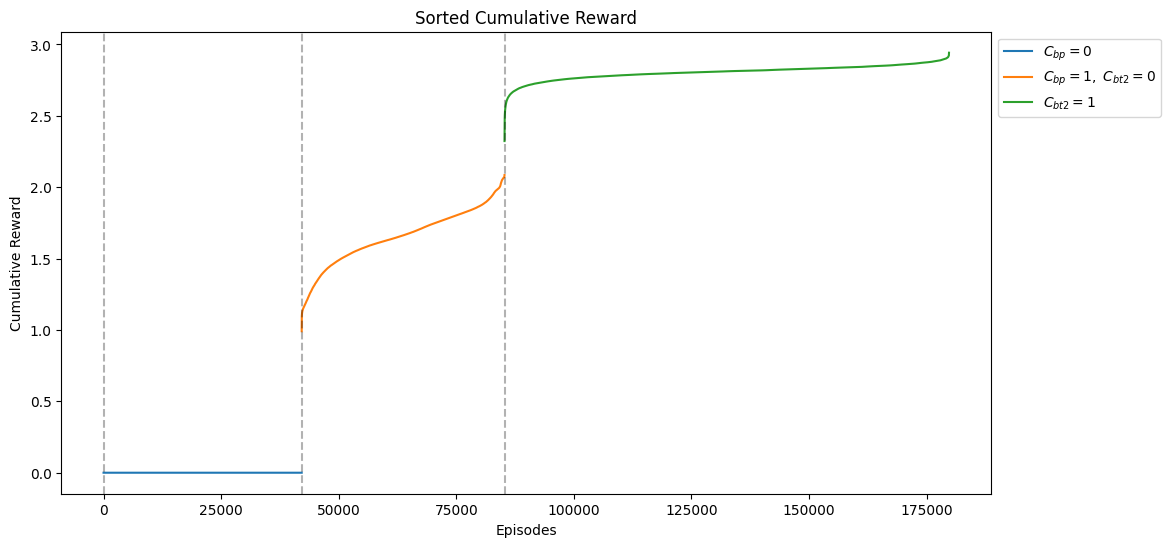

In [46]:
plot_sorted_cumulative_reward(df)

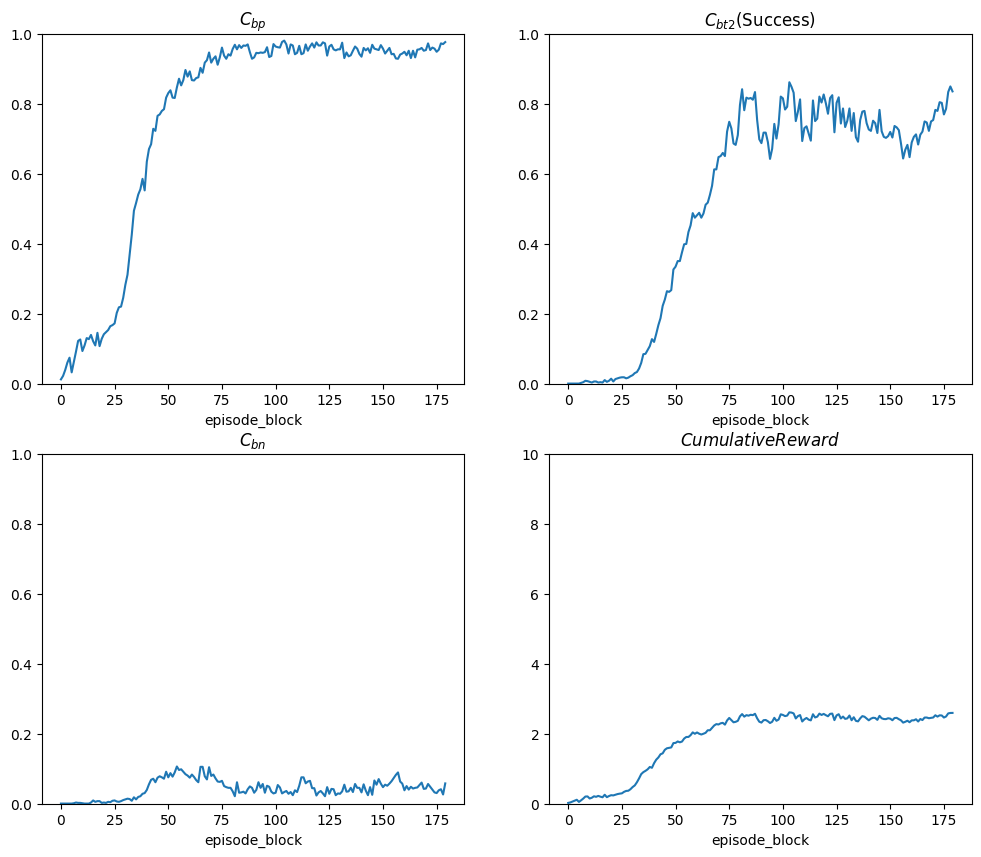

In [47]:
plot_metrics(df)

ball_x             89940
ball_y             89940
ball_z             89940
cbt1               89940
cbp                89940
cbt2               89940
cbn                89940
rtn                89940
steps              89940
paddle_x           89940
paddle_y           89940
paddle_z           89940
paddleUp_x         89940
paddleUp_y         89939
paddleUp_z         89939
paddleForward_x    89939
paddleForward_y    89939
paddleForward_z    89939
joint0             89939
joint1             89939
joint2             89939
joint3             89939
joint4             89939
joint5             89939
joint6             89939
joint7             89939
episode_block      89940
dtype: int64


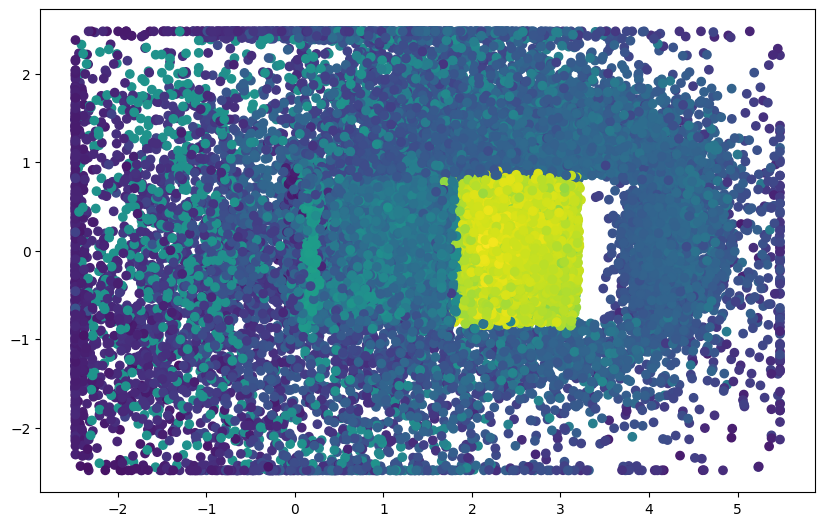

In [17]:
plot_landing_point_with_return2D(df.query('cbp==1'))

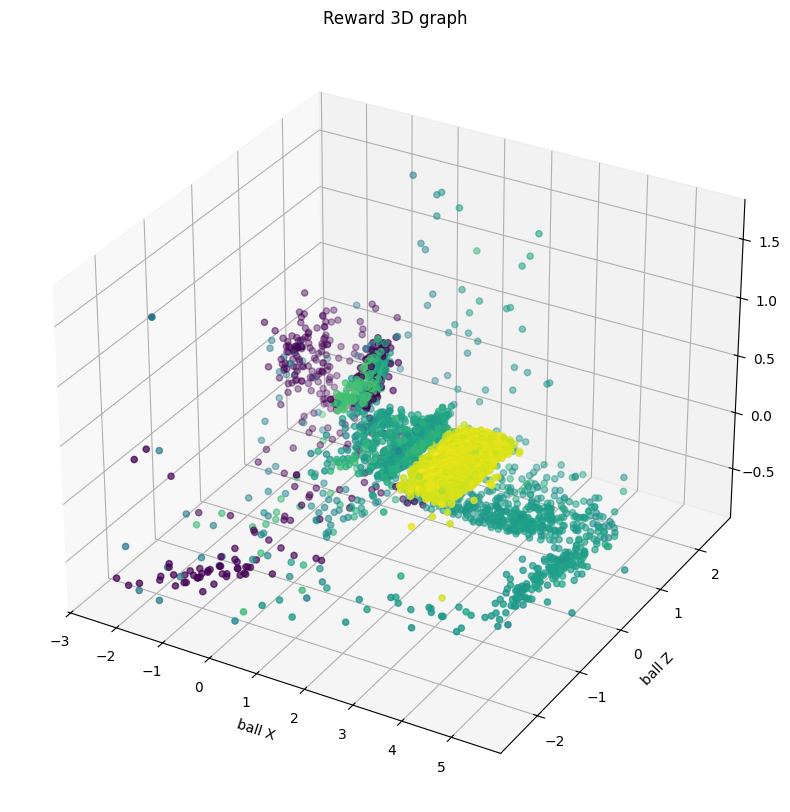

In [18]:
plot_landing_point_with_return3D(df[-10000:])

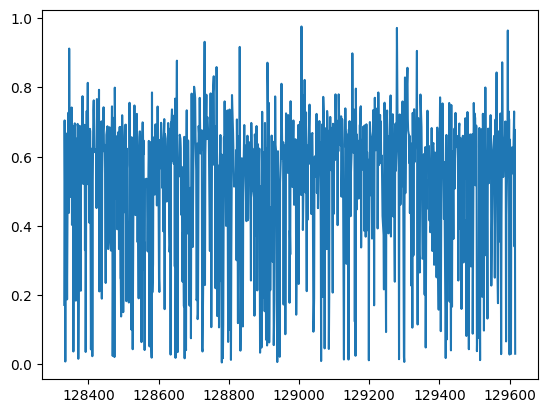

In [28]:
plot_joint_position(df.query('cbt2==1')[-1000:], 0)

In [24]:
df.describe()

,ball_x,ball_y,ball_z,cbt1,cbp,cbt2,cbn,rtn,steps,paddle_x,...,paddleForward_z,joint0,joint1,joint2,joint3,joint4,joint5,joint6,joint7,episode_block
count,129618.000000,129618.000000,129618.000000,129618.0,129618.000000,129618.000000,129618.000000,129618.000000,129618.000000,129618.000000,...,129617.000000,129617.000000,129617.000000,129617.000000,129617.000000,129617.000000,129617.000000,129617.000000,129617.000000,129618.000000
mean,0.974579,-0.159584,0.209219,1.0,0.693885,0.444151,0.040720,1.653780,65.716984,-0.007792,...,-0.176237,-0.346672,0.001499,-0.001862,0.001842,0.001692,0.001297,0.005585,-0.000399,64.309911
std,1.974846,0.387895,0.751472,0.0,0.460880,0.496873,0.197641,1.195711,13.091473,0.255732,...,0.510414,0.384332,0.003109,0.003213,0.002788,0.004430,0.005203,0.005227,0.003945,37.418100
min,-2.480003,-0.765924,-2.480001,1.0,0.000000,0.000000,0.000000,0.000000,15.000000,-0.740323,...,-0.999985,-1.000000,-0.017102,-0.015874,-0.016827,-0.018659,-0.017716,-0.017561,-0.018401,0.000000
25%,-0.789930,-0.669350,-0.133583,1.0,0.000000,0.000000,0.000000,0.000000,58.000000,-0.195984,...,-0.570063,-0.668899,-0.000095,-0.003675,0.000545,-0.000496,-0.000572,0.001489,-0.002140,32.000000
50%,1.917608,0.020000,0.162923,1.0,1.000000,0.000000,0.000000,1.807125,65.000000,-0.060453,...,-0.265872,-0.455209,0.001937,-0.002411,0.002443,0.001860,0.002590,0.006362,-0.000304,64.000000
75%,2.513031,0.075276,0.554388,1.0,1.000000,1.000000,0.000000,2.800331,75.000000,0.163589,...,0.214965,-0.003111,0.003357,-0.000651,0.003516,0.004349,0.004636,0.009863,0.001768,97.000000
max,5.480007,3.329134,2.480001,1.0,1.000000,1.000000,1.000000,2.942122,131.000000,0.853101,...,0.999991,1.000000,0.017382,0.015788,0.015477,0.019240,0.019528,0.017654,0.017802,129.000000


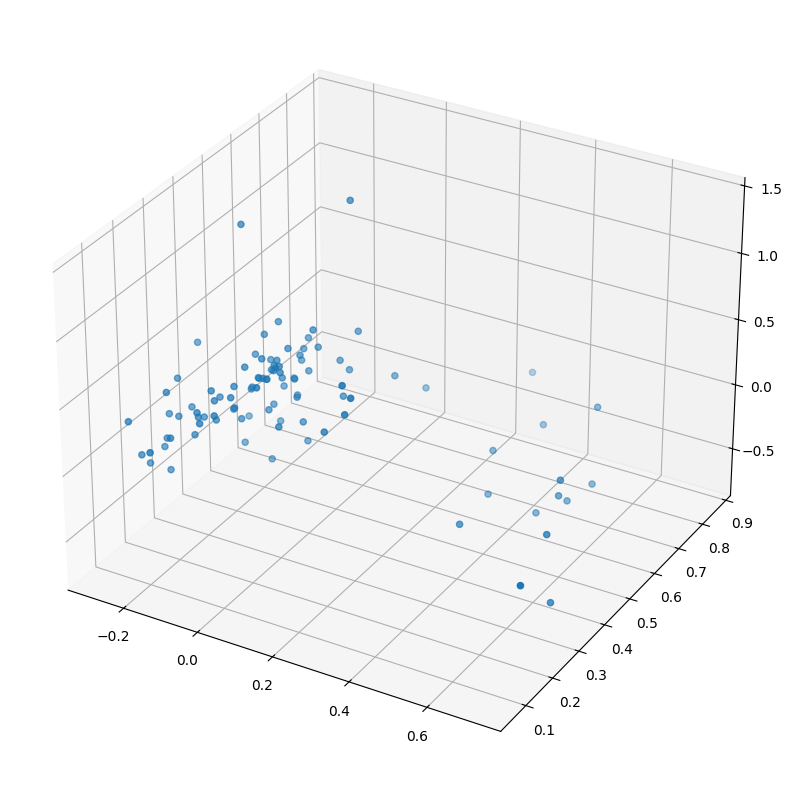

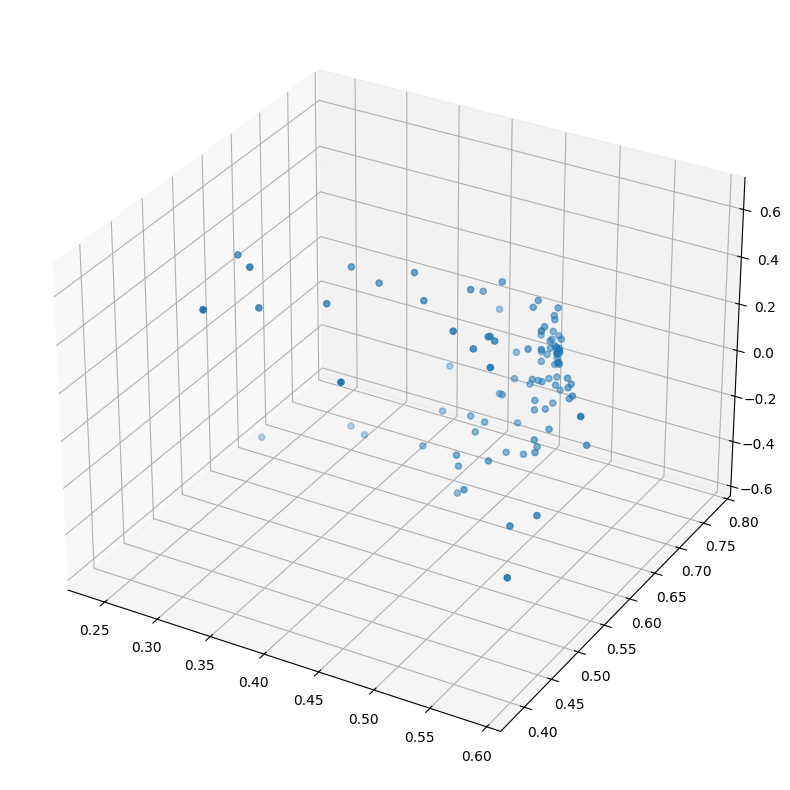

In [57]:
plot_paddle_position(df[-100:])
plot_paddle_position(df[:100])

In [49]:
df.columns

Index(['ball_x', 'ball_y', 'ball_z', 'cbt1', 'cbp', 'cbt2', 'cbn', 'rtn',
       'steps', 'paddle_x', 'paddle_y', 'paddle_z', 'paddleUp_x', 'paddleUp_y',
       'paddleUp_z', 'paddleForward_x', 'paddleForward_y', 'paddleForward_z',
       'joint0', 'joint1', 'joint2', 'joint3', 'joint4', 'joint5', 'joint6',
       'joint7', 'episode_block'],
      dtype='object')